In [ ]:
# Install FEniCS
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin

--2024-03-04 23:08:01--  https://fem-on-colab.github.io/releases/fenics-install-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.109.153, 185.199.111.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4161 (4.1K) [application/x-sh]
Saving to: ‘/tmp/fenics-install.sh’

/tmp/fenics-install 100%[===================>]   4.06K  --.-KB/s    in 0s      

2024-03-04 23:08:01 (31.6 MB/s) - ‘/tmp/fenics-install.sh’ saved [4161/4161]

+ INSTALL_PREFIX=/usr/local
++ awk -F/ '{print NF-1}'
++ echo /usr/local
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FENICS_INSTALLED=/usr/local/share/fem-on-colab/fenics.installed
+ [[ ! -f /usr/local/share/fem-on-colab/fenics.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/5fbf72c/releases/pybind11-inst

<div class="alert alert-warning">
<font size="5"><strong>User-Defined Functions</strong></font>
</div>

When defining a function in terms of a mathematical expression inside a string formula, e.g.,`

```
myfunc = Expression('sin(x[0])*cos(x[1])', degree=3)
```

the **expression** contained in the first argument will be turned into a C++ function and compiled to gain efficiency. Therefore, the syntax used in the expression must be valid C++ syntax.
Most Python syntax for mathematical expressions are also valid C++ syntax, but power expressions make an exception: $p**a$ must be written as pow(p,a) in C++ (this is also an alternative Python syntax).

The following mathematical functions can be used directly in C++ expressions when defining Expression objects: **cos, sin, tan, acos, asin, atan, atan2, cosh, sinh, tanh, exp, frexp, ldexp, log, log10, modf, pow, sqrt, ceil, fabs, floor, and fmod**. Moreover, the number $\pi$ is available as the symbol **pi**.


Parameters in expression strings must be initialized via keyword arguments when creating the Expression object:`

```
myfunc = Expression("sin(w_x*x[0])*cos(w_y*x[1])",
                     w_x=pi, w_y=2*pi, degree=DEGREE)
```

There cannot be `if` branches in the expression. However, one can use the inline branching (the ? and : combination) in C++. For example, the function
$$
f(x,y)=\begin{cases}
x^{2}, & x,y\ge0,\\
2, & \text{otherwise},
\end{cases}
$$
can be implemented as:

In [ ]:
#
from dolfin import *
f = Expression('x[0]>=0 && x[1]>=0 ? pow(x[0], 2) : 2', degree=2)
f(2,-1)

2.0

**Parameters in expression strings** are allowed, but must be initialized via keyword arguments when creating the Expression object.

For example, the function $f(x)=e^{-\kappa \pi ^2 t}\sin(\pi k x)$ can be coded as:

In [ ]:
f = Expression('exp(-kappa*pow(pi, 2)*t)*sin(pi*k*x[0])', degree=2, kappa=1.0, t=0, k=4)

In [ ]:
f(1)

-4.898587196589413e-16

At any time, parameters can be updated. For example:

In [ ]:
f.t += 0.1
f.k = 10

In [ ]:
f.t

0.1

### Example 1. Define an expression using "degree".


  Choose a single argument for the function:
  x =  (0.4, 0.24)

  Evaluate the function:
  f_expr ( x ) =  0.9491798235084412
Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_3801828c0f66b7190a7fd5819465b3d5b34b9149

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00505424 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.366402 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:----------------------------

  Saving graphics in "Example1.png"

Example 1:
  Normal end of execution.

Sun Feb 25 22:26:24 2024


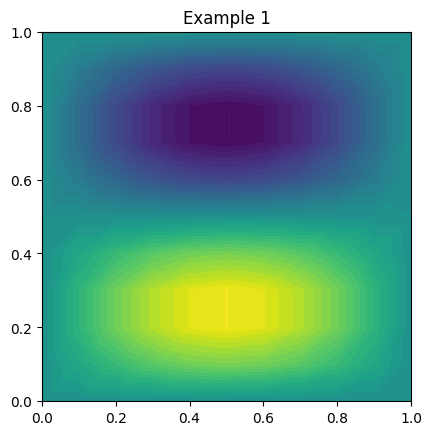

In [ ]:
#
from dolfin import *
import matplotlib.pyplot as plt
#import platform
import time
#
#  Define an expression using "degree".
#
f_expr = Expression ( 'sin ( pi * x[0] ) * sin ( 2 * pi * x[1] )', degree = 10 )
#
#  Evaluate the expression.
#
print ( '' )
print ( '  Choose a single argument for the function:' )
x = ( 0.40, 0.24 )
print ( '  x = ', x )
#
print ( '' )
print ( '  Evaluate the function:' )
value = f_expr ( x )
print ( '  f_expr ( x ) = ', value )
#
#  Plot the expression over a given mesh.
#
my_mesh = UnitSquareMesh ( 10, 10 )
fig = plot ( f_expr, mesh = my_mesh, title = 'Example 1' )
filename = 'Example1.png'
plt.savefig ( filename )
print ( '  Saving graphics in "%s"' % filename )
#
#  Terminate.
#
print ( '' )
print ( 'Example 1:' );
print ( '  Normal end of execution.' )
print ( '' )
print ( time.ctime ( time.time() ) )

### Example 2. Create an expression with default parameter values.

In [ ]:
print ( '' )
print ( '  Define F = Expression ( "pow ( x[0], POWER )", POWER = 2, ... )' )
F = Expression ( "pow ( x[0], POWER )", POWER = 2, degree = 10 )
#
#  evaluate the expression with the default parameter value.
#
x = 3.0
print ( '  x = ', x )
value = F ( x )
print ( '  F ( x ) = ', value )
#
#  Change the parameter value and reevaluate.
#
print ( '  Update the parameter g_expr.POWER = 3' )
F.POWER = 3
value = F ( x )
print ( '  F ( x ) = ', value )


  Define F = Expression ( "pow ( x[0], POWER )", POWER = 2, ... )
  x =  3.0
  F ( x ) =  9.0
  Update the parameter g_expr.POWER = 3
  F ( x ) =  27.0


### Example 3. Define a vector-valued expression.

In [ ]:
print ( '' )
print ( '  Define F = Expression ( ( "sin(pi*x[0])", "cos(pi*x[0])" ), degree = 10 )' )
#
F = Expression ( ( 'sin(pi*x[0])', 'cos(pi*x[0])' ), degree = 10 )
x = 1.0 / 3.0
value = F ( x )
print ( '  F ( x ) = ', value )


  Define F = Expression ( ( "sin(pi*x[0])", "cos(pi*x[0])" ), degree = 10 )
  F ( x ) =  [0.8660254 0.5      ]


### Example 4. Use Expression in a finite element calculation.

We set up the following Poisson problem:

$$
- \Delta u = f ,       \text{ in } \Omega = [0,1]\times[0,1], \\
   u = u_{ex},   \text{ on } \partial \Omega,
$$

where
$$u_{ex} = e^{-100.0((x - 0.03)^2 + (y - 0.03)^2)} + e^{-1000.0((x - 1.0)^2 + (y - 1.0)^2)}$$

is the exact solution. Inserting $u_{ex}$ into the  PDE gives $f$.

$$
f (x,y) = (400.0 - 40000.0((x - 0.03)^2 + (y - 0.03)^2))e^{-100.0((x - 0.03)^2 + (y - 0.03)^2)} + (4000.0 - 4000000.0((x - 1.0)^2 + (y - 1.0)^2)) e^{-1000.0((x - 1.0)^2 + (y - 1.0)^2)}
$$

In [ ]:
#
#  Create a triangular mesh on the unit square.
#
my_mesh = UnitSquareMesh ( 10, 10 )
#
#  Define the function space.
#
V = FunctionSpace ( my_mesh, 'P', 1 )
#
#  Define the exact solution using an expression:
#
ue = Expression('exp(-100.0*((x[0] - 0.03)*(x[0] - 0.03) + (x[1] - 0.03)*(x[1] - 0.03))) + exp(-1000.0*((x[0] - 1.0)*(x[0] - 1.0) + (x[1] - 1.0)*(x[1] - 1.0)))', degree = 4 )
#
#  Use the expression to define the boundary condition.
#
def boundary ( x, on_boundary ):
    return on_boundary

bc = DirichletBC ( V, ue, boundary )
#
#  Define the variational problem.
#
u = TrialFunction ( V )
v = TestFunction ( V )
#
f = Expression ( '(400.0 - 40000.0*((x[0] - 0.03)*(x[0] - 0.03) + (x[1] - 0.03)*(x[1] - 0.03)))*exp(-100.0*((x[0] - 0.03)*(x[0] - 0.03) + (x[1] - 0.03)*(x[1] - 0.03))) + (4000.0 - 4000000.0*((x[0] - 1.0)*(x[0] - 1.0) + (x[1] - 1.0)*(x[1] - 1.0)))*exp(-1000.0*((x[0] - 1.0)*(x[0] - 1.0) + (x[1] - 1.0)*(x[1] - 1.0)))', degree = 4 )
#
a = dot ( grad ( u ), grad ( v ) ) * dx
L = f * v * dx
#
#  Compute the solution.
#
uh = Function ( V )
solve ( a == L, uh, bc )
#
#  Use the expression to compute the error in the L2 norm.
#
error_L2 = errornorm ( ue, uh, 'L2' )
print ( '  error_L2  =', error_L2 )
#
#  Use the expression to compute the maximum error at mesh vertices.
#
vertex_values_u_exact_expr = ue.compute_vertex_values ( my_mesh )
vertex_values_uh = uh.compute_vertex_values ( my_mesh )
import numpy as np
error_max = np.max ( np.abs ( vertex_values_u_exact_expr - vertex_values_uh ) )
print ( '  error_max =', error_max )

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_260cf584d91d85e4640fae1f794bb00591898efb

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    1
  Coefficients:              '[f_20]'
  Unique elements:           'CG1(?,?), CG4(?,?), Vector<2 x CG1(?,?)>'
  Unique sub elements:       'CG1(?,?), CG4(?,?), Vector<2 x CG1(?,?)>'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 5
INFO:FFC:  quadrature_degree: 5
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0585999 seconds.

INFO:FFC:Compiler stage 

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_4f750817ecc896f3bedcb4ff8c9f3352153b1b38

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00204754 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0100837 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_c1a44a1508926ecf46b6f2c21ef278ceddb99e6c

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0048461 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0155084 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representatio

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling coordinate_mapping ffc_coordinate_mapping_3720490578293ae8ad5feabedc46584f48fda4c4

INFO:FFC:Compiler stage 1: Analyzing coordinate_mapping(s)
INFO:FFC:-------------------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00363135 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 0 elements
INFO:FFC:  Computing representation of 0 dofmaps
INFO:FFC:  Computing representation of 1 coordinate mappings
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0111389 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:--------------------------------------------------------
INFO

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_6d178efb7219a9d3a72860e27d0bb2cc12542b0f

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    0
  Coefficients:              '[]'
  Unique elements:           'CG1(?,?), Vector<2 x CG1(?,?)>'
  Unique sub elements:       'CG1(?,?), Vector<2 x CG1(?,?)>'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 0
INFO:FFC:  quadrature_degree: 0
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0267072 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-----------------------------

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_76fc3cd9625812038c7471125b47cc4c7ae9ad4e

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00628304 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.354103 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:----------------------------

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_6ce8a510087f4e034b86fc6d0bf27a775643b273

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      0
  Arguments:                 '()'
  Number of coefficients:    1
  Coefficients:              '[f_43]'
  Unique elements:           'DG4(?,?), Vector<2 x CG1(?,?)>'
  Unique sub elements:       'DG4(?,?), Vector<2 x CG1(?,?)>, CG1(?,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 8
INFO:FFC:  quadrature_degree: 8
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0188029 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-----------------------

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_899f792bca9deb3c3f12f5cb62d42f0545d411ea

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00227046 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.010129 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representatio

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_79dd4099c4e669212673d783637297ee756e6a33

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00436068 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0142021 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_8f9acf292fa7994d298cc8c76ab5884f206fd987

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0038507 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0161731 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representatio

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling coordinate_mapping ffc_coordinate_mapping_66170f427fb7c9d9caadb39d728b0be317507df5

INFO:FFC:Compiler stage 1: Analyzing coordinate_mapping(s)
INFO:FFC:-------------------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00719118 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 0 elements
INFO:FFC:  Computing representation of 0 dofmaps
INFO:FFC:  Computing representation of 1 coordinate mappings
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0112672 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:--------------------------------------------------------
INFO

  error_L2  = 0.03799355834011876
  error_max = 0.0742177397424883


In [ ]:
uh(0.5,0.5)

-0.002500013495893094

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_260cf584d91d85e4640fae1f794bb00591898efb

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    1
  Coefficients:              '[f_15]'
  Unique elements:           'CG1(?,?), CG4(?,?), Vector<2 x CG1(?,?)>'
  Unique sub elements:       'CG1(?,?), CG4(?,?), Vector<2 x CG1(?,?)>'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 5
INFO:FFC:  quadrature_degree: 5
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.116787 seconds.

INFO:FFC:Compiler stage 2

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_4f750817ecc896f3bedcb4ff8c9f3352153b1b38

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00344944 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0182498 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_c1a44a1508926ecf46b6f2c21ef278ceddb99e6c

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0233002 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.101891 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling coordinate_mapping ffc_coordinate_mapping_3720490578293ae8ad5feabedc46584f48fda4c4

INFO:FFC:Compiler stage 1: Analyzing coordinate_mapping(s)
INFO:FFC:-------------------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0057137 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 0 elements
INFO:FFC:  Computing representation of 0 dofmaps
INFO:FFC:  Computing representation of 1 coordinate mappings
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0166361 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:--------------------------------------------------------
INFO:

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_6d178efb7219a9d3a72860e27d0bb2cc12542b0f

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    0
  Coefficients:              '[]'
  Unique elements:           'CG1(?,?), Vector<2 x CG1(?,?)>'
  Unique sub elements:       'CG1(?,?), Vector<2 x CG1(?,?)>'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 0
INFO:FFC:  quadrature_degree: 0
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0589626 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-----------------------------

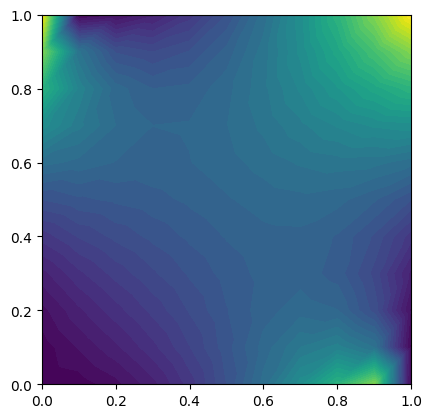

In [ ]:
from dolfin import *
import matplotlib.pyplot as plt

# mesh define
my_mesh = UnitSquareMesh ( 10, 10 )

# Function
V = FunctionSpace ( my_mesh, 'P', 1 )

# grand u = f
f = Expression('cos(x[0])*sin(x[1])', degree = 4 )

# boundary condetion creation
u1 = Expression('x[1]*x[1]-1', degree = 4 )
u2 = Expression('x[0]*x[0]-1', degree = 4 )

def bottom(x, on_boundary):
  return near(x[1], 0)
bc2 = DirichletBC ( V, u2, bottom )
def top(x, on_boundary):
  return near(x[1], 1)
bc1 = DirichletBC ( V, u2, top )
def right(x, on_boundary):
  return near(x[0], 1)
bc4 = DirichletBC ( V, u1, right )
def left(x, on_boundary):
  return near(x[0], 0)
bc3 = DirichletBC ( V, u1, left )


bcs = [bc1,bc2,bc3,bc4]

#  Define the variational problem.
#
u = TrialFunction ( V )
v = TestFunction ( V )
#
a = dot ( grad ( u ), grad ( v ) ) * dx
L = f * v * dx
#
#  Compute the solution.
#
uh = Function ( V )
solve ( a == L, uh, bcs )
plot(uh)

In [ ]:

#
from fenics import *
from mshr import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_3801828c0f66b7190a7fd5819465b3d5b34b9149

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00522375 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.319599 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:----------------------------

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_260cf584d91d85e4640fae1f794bb00591898efb

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    1
  Coefficients:              '[f_28]'
  Unique elements:           'CG1(?,?), CG4(?,?), Vector<2 x CG1(?,?)>'
  Unique sub elements:       'CG1(?,?), CG4(?,?), Vector<2 x CG1(?,?)>'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 5
INFO:FFC:  quadrature_degree: 5
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.103606 seconds.

INFO:FFC:Compiler stage 2

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_4f750817ecc896f3bedcb4ff8c9f3352153b1b38

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0067358 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0243194 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representatio

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_c1a44a1508926ecf46b6f2c21ef278ceddb99e6c

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00540495 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0291004 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling coordinate_mapping ffc_coordinate_mapping_3720490578293ae8ad5feabedc46584f48fda4c4

INFO:FFC:Compiler stage 1: Analyzing coordinate_mapping(s)
INFO:FFC:-------------------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00429535 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 0 elements
INFO:FFC:  Computing representation of 0 dofmaps
INFO:FFC:  Computing representation of 1 coordinate mappings
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0110285 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:--------------------------------------------------------
INFO

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_6d178efb7219a9d3a72860e27d0bb2cc12542b0f

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    0
  Coefficients:              '[]'
  Unique elements:           'CG1(?,?), Vector<2 x CG1(?,?)>'
  Unique sub elements:       'CG1(?,?), Vector<2 x CG1(?,?)>'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 0
INFO:FFC:  quadrature_degree: 0
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.03896 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------

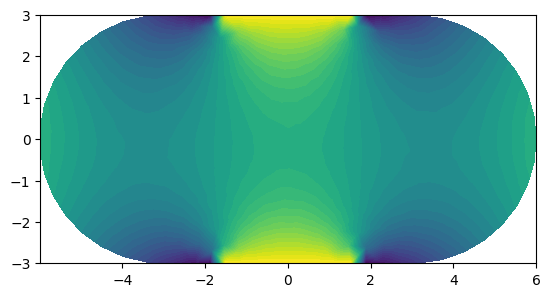

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from fenics import *
from mshr import *

#
circle1 = Circle(Point(-3, 0), 3)
circle2 = Circle(Point(3, 0), 3)
rectangle = Rectangle(Point(-3, -3), Point(3, 3))
domain = circle1 + rectangle + circle2

# Generate mesh
my_mesh = generate_mesh(domain, 20)

#
V = FunctionSpace(my_mesh, 'P', 1)

# boundary conditions
u1 = Expression('x[1]*x[1] + x[0]*x[0]', degree=4)
u2 = Constant(50.0)

def bottom(x, on_boundary):
    return near(x[1], -3) and on_boundary

def top(x, on_boundary):
    return near(x[1], 3) and on_boundary

def left(x, on_boundary):
    return on_boundary and sqrt((x[0]+3)**2 + (x[1])**2) < 3 * 1.1

def right(x, on_boundary):
    return on_boundary and sqrt((x[0]-3)**2 + (x[1])**2) < 3 * 1.1

bc1 = DirichletBC(V, u2, top)
bc2 = DirichletBC(V, u2, bottom)
bc3 = DirichletBC(V, u1, left)
bc4 = DirichletBC(V, u1, right)
bcs = [bc1, bc2, bc3, bc4]

#
u = TrialFunction(V)
v = TestFunction(V)

#
f = Expression('cos(x[0])*sin(x[1])', degree=4)

#
a = dot(grad(u), grad(v)) * dx
L = f * v * dx

#
uh = Function(V)
solve(a == L, uh, bcs)

# Plot
plt.figure()
plot(uh)
plt.show()


In [ ]:
# Homework





In [ ]:
print ( '' )
print ( '  Use subclassing to set up an expression that is too complicated' )
print ( '  for a one-line definition.' )
#
#  Mesh the unit square.
#
n = 4
mesh = UnitSquareMesh ( n, n, 'right/left' )
#
#  Define the function space.
#
V = FunctionSpace ( mesh, 'P', 1 )
#
#  Note that we can use the Python exponentiation format here.
#  I'm not sure where this is actually explained, with a comprehensible example.
#
class k_user_expr ( UserExpression ):
    def eval ( self, values, x ):
        t1 = x[0]
        t2 = x[1]
        values[0] = t1 + t2
    def value_shape ( self ):
        return ()
#
#  Turn the user expression into an expression by including the degree.
#
k_expr = k_user_expr ( degree = 4 )
#
#  Now we can evaluate the expression, if we include the degree.
#
x = ( 0.40, 0.24 )
print ( '  x = ', x )
k_value = k_user_expr ( x, degree = 4 )
print ( '  k_expr ( x ) = ', k_value )
#
#  Project the expression into V, making a finite element function.
#
k_fefun = project ( k_user_expr ( ), V )
#
#  Plot the finite element function.
#
fig = plot ( k_fefun, title = 'k_fefun' )
plt.colorbar ( fig )
filename = 'expression_test33.png'
plt.savefig ( filename )
print ( '  Graphics saved as "%s"' % ( filename ) )
plt.close ( )


  Use subclassing to set up an expression that is too complicated
  for a one-line definition.
  x =  (0.4, 0.24)
  k_expr ( x ) =  f_77
  Graphics saved as "expression_test33.png"


# <img src="./expression_test33.png" width='300pt'/>

<div class="alert alert-danger">
<font size="5"><strong>Heat conduction - Thermal diffusion</strong></font>
</div>



<div class="alert alert-warning">
<font size="4"><strong>MATHEMATICAL FORMULATION: </strong></font>
</div>

Consider the stationray heat equation:

\begin{eqnarray*}
 \text{ div }\mathbf{q}  =  f &      \text{ in } \Omega,
\end{eqnarray*}

where $\mathbf{q}$ is the heat flux and $f$ denotes a heat source within the domain $\Omega$.

The thermal material is described by the following linear Fourier Law:

$$
\mathbf{q} = -\mathbf k \mathbf{\nabla} u
$$

where $u$ is the temperature and $\mathbf k$ is thermal conductivity; in the simple case of thermally isotropic material, $\mathbf k = k \mathbf I$ with $k$ the isotropic thermal conductivity. The thermal conductivity may very well depend on the temperature  itself. This will then result in a nonlinear heat equation.

**For the case of an isotropic and homogeneous body, the heat equation specializes as follows**

\begin{eqnarray*}
- k \Delta T  =  f &      \text{ in } \Omega,
\end{eqnarray*}

**where $\Delta$ is the standard Laplace operator.**

Equation (7) is completed by proper boundary conditions. For simplicity, we consider the boundary value problem, that is,
$$
\left\{
\begin{array}{ll}
u = T_0 & \text{ on }  \Gamma_D, \\
k \nabla u \cdot {\bf n} = g & \text{ on }  \Gamma_N.
\end{array}
\right.$$

Here, $\Gamma_D \subset \partial \Omega$ denotes the part of the boundary where we prescribe Dirichlet boundary conditions and $\Gamma_N \subset \partial \Omega$ denotes the part of the boundary where we prescribe Neumann boundary conditions. $\bf{n}$ denotes the unit normal of $\partial \Omega$ pointing outside $\Omega$.


<div class="alert alert-warning">
<font size="4"><strong>Weak formulation: </strong></font>
</div>

Let us define the spaces $V_{T_0}, V_0 \in \Omega$ as

$$ V_{T_0} := \left\{ v \in H^1(\Omega) \text{ s. t. } v = T_0 \text{ on } \Gamma_D \right\},$$

$$ V_{0} := \left\{ v \in H^1(\Omega) \text{ s. t. } v = 0 \text{ on } \Gamma_D \right\}.$$

To obtain the weak formulation, we multiply the PDE by an arbitrary function $v \in V_0$ and integrate over the domain $\Omega$ leading to

$$ -\int_{\Omega} \nabla \cdot (k \nabla u) v \, dx = \int_\Omega f v \, dx\quad \forall \; v \in V_0. $$

Then, integration by parts the non-conforming term gives

$$ \int_{\Omega} k \nabla u \cdot \nabla v \, dx - \int_{\partial \Omega} k \frac{\partial u}{\partial {\bf n} } v \, ds = \int_\Omega f v \, dx \quad \forall \; v \in V_0. $$

Finally by recalling that $ v = 0 $ on $\Gamma_D$ and that $k \frac{\partial u}{\partial {\bf n} } = g $ on $\Gamma_N$, we find the weak formulation:

*Find  $u \in V_{T_0}$ such that*
$$ \int_{\Omega} k \nabla u \cdot \nabla v \, dx = \int_\Omega f v \, dx + \int_{\Gamma_N} g v \, ds \quad \forall \; v \in V_0. $$

<div class="alert alert-warning">
<font size="5"><strong>Solving a PDE in FEniCS
: </strong></font>
</div>

<div class="alert alert-warning">
<font size="4"><strong>Concrete example:
</strong></font>
</div>

Next, we need to specify $\{ {u_D},f,\Omega \}$. We choose a simple 2D domain: the unit square $\Omega = [0,1] \times [0,1]$ .

Here
\begin{eqnarray*}
k(x,y) = 1  & \text{ on } \Omega\\
f(x,y) = \left(4\pi^2+\frac{\pi^2}{4}\right)\sin(2 \pi x) \sin\left(\frac{\pi}{2} y\right) & \text{ on } \Omega\\
u_0(x,y)      = 0 & \text{ on } \Gamma_D, \\
g(x) = \left\{ \begin{array}{l} -\frac{\pi}{2}\sin(2 \pi x) \\ 0 \end{array}\right.
& \begin{array}{l} \text{ on } \Gamma_{\rm bottom},\\ \text{ on } \Gamma_{\rm top}.\end{array}
\end{eqnarray*}

### 1. Imports

We import the following Python packages:

In [ ]:
from fenics import *
import matplotlib.pyplot as plt

# to plot the result in the Notebook
%matplotlib inline

### 2. Generating a mesh and define the finite element space

dim(Vh) =  121


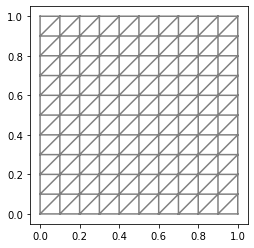

In [ ]:
from mshr import *
n = 10
d = 1
mesh = RectangleMesh(Point(0, 0), Point(1, 1), n, n)
plot(mesh)

Vh  = FunctionSpace(mesh, 'Lagrange', d)
print ("dim(Vh) = ", Vh.dim())

### 3. Setting problem parameters

In [ ]:
k = Constant(1.)

u_L = Constant(0.)
u_R = Constant(0.)

g_bottom = Expression('-(pi/2.0)*sin(2*pi*x[0])', degree=d+2)
g_top    = Expression('0', degree=0)

f = Expression('(4.0*pi*pi+pi*pi/4.0)*(sin(2*pi*x[0])*sin((pi/2.0)*x[1]))', degree=d+2)

### 4. Define boundary labels

To partition the boundary of $\Omega$ in the subdomains $\Gamma_{\rm top}$, $\Gamma_{\rm bottom}$, $\Gamma_{\rm left}$, $\Gamma_{\rm right}$ we assign a unique label `boundary_parts` to each of part of $\partial \Omega$. We use a **class** of **SubDomain** to identify the various parts of the mesh function.

In order to apply boundary conditions, we must mark the different parts of the boundary correctly. and mark these as subdomains  1, 2, 3 and 4, respectively.

In [ ]:
# Define the Top part of the boundary
class TopBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and abs(x[1] - 1) < DOLFIN_EPS
# Define the Bottom part of the boundary
class BottomBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and abs(x[1]) < DOLFIN_EPS
# Define the Left part of the boundary
class LeftBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and abs(x[0]) < DOLFIN_EPS
# Define the Right part of the boundary
class RightBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and abs(x[0] - 1) < DOLFIN_EPS

boundary_parts = MeshFunction("size_t", mesh, mesh.topology().dim()-1, 0)

# mark the entire boundary as 0

boundary_parts.set_all(0)

# Mark the boundaries as subdomains  1, 2, 3 and 4

Gamma_top = TopBoundary()
Gamma_top.mark(boundary_parts, 1)

Gamma_bottom = BottomBoundary()
Gamma_bottom.mark(boundary_parts, 2)

Gamma_left = LeftBoundary()
Gamma_left.mark(boundary_parts, 3)

Gamma_right = RightBoundary()
Gamma_right.mark(boundary_parts, 4)

### 5. Defining boundary conditions

In order to apply boundary conditions, we must mark the different parts of the boundary correctly.
In FEniCS, we create a new boundary measure `ds[i]` to integrate over the portion of the boundary marked with label `i`.

In [ ]:
# Define Dirichlet boundary condition
bcs = [DirichletBC(Vh, u_L, boundary_parts, 3),
       DirichletBC(Vh, u_R, boundary_parts, 4)]
# Define the integration on boundary
ds = Measure("ds", domain=mesh, subdomain_data=boundary_parts)

### 6. Defining the variational problem

In [ ]:
u = TrialFunction(Vh)
v = TestFunction(Vh)
a = inner(nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx + g_top*v*ds(1) + g_bottom*v*ds(2)

uh = Function(Vh)

### 7. Solving the linear system

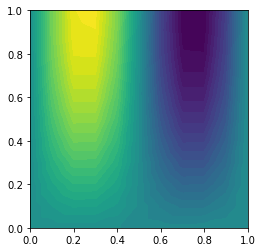

In [ ]:
uh = Function(Vh)
#solve(a == L, uh, bcs=bcs)
A, b = assemble_system(a,L, bcs=bcs)
solve(A, uh.vector(), b, "cg")

plot(uh)